In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data/ex2data1.txt', header=None, names=['exam1','exam2','admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
positive = data[data.admitted == 1]
negative = data[data.admitted == 0]
print('# of positive %i, # of negative shape %i' %(positive.shape[0], negative.shape[0]))

# of positive 60, # of negative shape 40


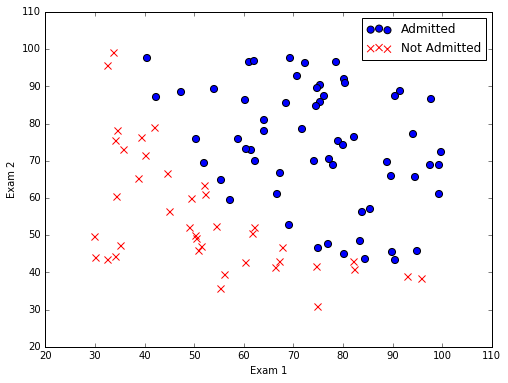

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel("Exam 1")
ax.set_ylabel("Exam 2")

## Logistic Regression

In [20]:
def sigmoid(z):
    """
    Converts input into a value between 0 and 1 - probability
    """
    return 1/(1 + np.exp(-z))

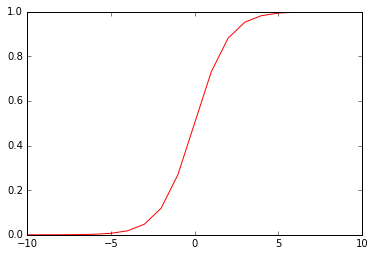

In [24]:
nums = np.arange(-10, 10, step=1)
fig,ax = plt.subplots()
ax.plot(nums, sigmoid(nums),'r')

In [26]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    z = sigmoid(X * theta.T)
    first = np.multiply(-y, np.log(z))
    second = np.multiply((1-y), np.log(1-z))
    return np.sum(first - second)/len(X)

In [27]:
data.insert(0,'ones',1)

In [30]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(X.shape[1])

X.shape, y.shape, theta.shape

((100, 3), (100, 1), (3,))

In [31]:
cost(theta, X, y)

0.69314718055994529

In [33]:
np.matrix(theta).ravel().shape, X.shape

((1, 3), (100, 3))

In [36]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(X.shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
        
    return grad

In [37]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X,y))

In [38]:
cost(result[0], X, y)

0.20349770158947425

In [39]:
def predict(theta, X):
    prob = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in prob]

In [48]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if (a == b) else 0 for (a,b) in zip(predictions, y)]
accuracy = sum(correct) % len(correct)
print("accuracy = {0}%".format(accuracy))

accuracy = 89%


## Regularized Logistic Regression

In [132]:
data2 = pd.read_csv('data/ex2data2.txt', header=None, names=['test1', 'test2', 'accepted'])
data2.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [133]:
positive = data2[data2.accepted == 1]
negative = data2[data2.accepted == 0]
data2.shape, positive.shape, negative.shape

((118, 3), (58, 3), (60, 3))

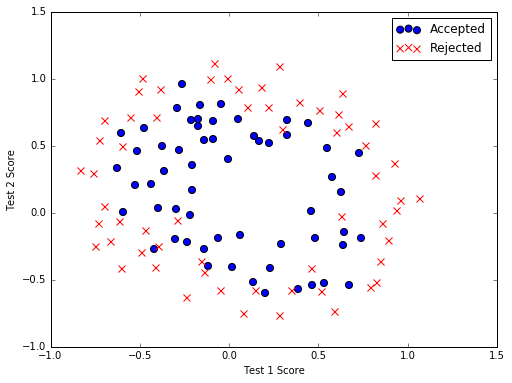

In [134]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(positive.test1, positive.test2, s=50, c='b', marker='o', label="Accepted")
ax.scatter(negative.test1, negative.test2, s=50,c='r', marker='x', label="Rejected")
ax.legend()
ax.set_xlabel("Test 1 Score")
ax.set_ylabel("Test 2 Score")

In [135]:
degree = 4
x1 = data2.test1
x2 = data2.test2

In [136]:
data2.insert(3,'ones',1)
data2.head()

,test1,test2,accepted,ones
0,0.051267,0.69956,1,1
1,-0.092742,0.68494,1,1
2,-0.213710,0.69225,1,1
3,-0.375000,0.50219,1,1
4,-0.513250,0.46564,1,1


In [137]:
for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('test1', axis=1, inplace=True)
data2.drop('test2', axis=1, inplace=True)
data2.head()      

,accepted,ones,F10,F20,F21,F30,F31,F32
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283


In [138]:
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    z = sigmoid(X * theta.T)
    first = np.multiply(-y, np.log(z))
    second = np.multiply((1-y), np.log(1-z))
    reg = (learningRate/2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]],2))
    return np.sum(first - second)/(len(X)) + reg

In [139]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(X.shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        if i == 0:
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = np.sum(term) / len(X) + ((learningRate/len(X)) * theta[:,i])
        
    return grad

In [140]:
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(X2.shape[1])

theta2.shape, X2.shape, y2.shape

((7,), (118, 7), (118, 1))

In [145]:
learningRate = 1

In [146]:
costReg(theta2, X2, y2, learningRate)

0.6931471805599454

In [147]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))  
result2

(array([  1.15335919e-04,   6.40574944e-05,  -4.96879211e-04,
         -1.10934501e-04,  -5.70852777e-05,  -8.54538310e-05,
         -5.10745461e-05]), 95, 4)

In [148]:
theta_min = np.matrix(result2[0])
pred = predict(theta_min, X2)
correct = [1 if (a == b) else 0 for (a, b) in zip(pred, y2)]  
accuracy = (sum(correct) % len(correct))  
print ("accuracy = {0}%".format(accuracy) )

accuracy = 76%
